# Regressão Simples

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import linregress
import statsmodels.api as sm

## Exemplo 1
Dataset tempodist

In [2]:
tempodist = pd.read_csv("dados/tempodist.csv", dtype=np.float64)

tempodist

,tempo,distancia
0,15.0,8.0
1,20.0,6.0
2,20.0,15.0
3,40.0,20.0
4,50.0,25.0
5,25.0,11.0
6,10.0,5.0
7,55.0,32.0
8,35.0,28.0
9,30.0,20.0


In [3]:
# Estatísticas univariadas
tempodist.describe()

,tempo,distancia
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


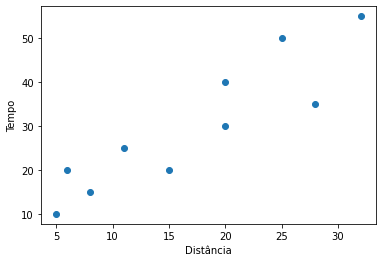

In [4]:
# Gráfico de dispersão
plt.scatter(tempodist.distancia, tempodist.tempo)
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.show()

Regressão Linear Simples para o Exemplo 1

**Pacote Scipy**

In [5]:
resultado = linregress(tempodist.distancia, tempodist.tempo)

print(f"Intercepto: {resultado.intercept:.4f}")
print(f"Inclinação: {resultado.slope:.4f}")
print(f"R2: {resultado.rvalue**2:.4f}")
print(f"P-valor: {resultado.pvalue:.6f}")
print(f"Erro Padrão: {resultado.stderr:.6f}")

Intercepto: 5.8784
Inclinação: 1.4189
R2: 0.8194
P-valor: 0.000314
Erro Padrão: 0.235497


**Pacote Statsmodels**

In [6]:
# Adiciona o termo constante ao dataset (a fim de calcular o intercepto)
X = sm.add_constant(tempodist.distancia)
# modelo
modelo = sm.OLS(tempodist.tempo, X).fit()

# Visualiza estatísticas
modelo.summary()

C:\Users\Daniel Souza - PC\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Daniel Souza - PC\anaconda\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           0.000314
Time:                        18:07:29   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Salvando fitted values e resíduos no dataset

In [7]:
tempodist['yhat'] = pd.Series(modelo.predict(X))
tempodist['residuos'] = tempodist['tempo'] - tempodist['yhat']

In [8]:
tempodist

,tempo,distancia,yhat,residuos
0,15.0,8.0,17.229730,-2.229730
1,20.0,6.0,14.391892,5.608108
2,20.0,15.0,27.162162,-7.162162
3,40.0,20.0,34.256757,5.743243
4,50.0,25.0,41.351351,8.648649
5,25.0,11.0,21.486486,3.513514
6,10.0,5.0,12.972973,-2.972973
7,55.0,32.0,51.283784,3.716216
8,35.0,28.0,45.608108,-10.608108
9,30.0,20.0,34.256757,-4.256757


Visualização do $R^2$

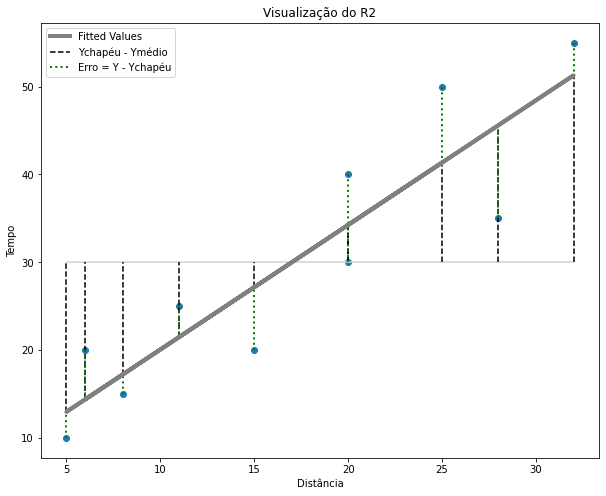

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(tempodist.distancia, tempodist.tempo)
plt.plot(tempodist.distancia, tempodist.yhat, color='grey', linewidth=4, label='Fitted Values')
plt.hlines(30, tempodist.distancia.min(), tempodist.distancia.max(), color='lightgrey')

plt.vlines(tempodist.distancia, np.minimum(tempodist.yhat, 30) , np.maximum(tempodist.yhat, 30),
           color = 'black', linestyles='dashed', label='Ychapéu - Ymédio')
plt.vlines(tempodist.distancia, tempodist.tempo, tempodist.yhat,
           color = 'green', linestyles='dotted', linewidth=2, label='Erro = Y - Ychapéu')


plt.legend()
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.title("Visualização do R2")
plt.show()